# Thinking probabilistically - Discrete variables


<b>

+ Random number generators and hacker statistics
    + Generating random numbers using the np.random module
    + The np.random module and Bernoulli trials
    + How many defaults might we expect?
    + Will the bank fail?
+ Probability distributions and stories: The Binomial distribution
    + Sampling out of the Binomial distribution
    + Plotting the Binomial PMF
+ Poisson processes and the Poisson distribution
    + Relationship between Binomial and Poisson distributions
    + Was 2015 anomalous?

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/reddyprasade/Data-Analysis-with-Python/main/Statistics/Data/iris_lables.csv"

In [3]:
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
renamed_columns = ['sepal length (cm)', 'sepal width (cm)', 
                   'petal length (cm)', 'petal width (cm)', 'species']
df.columns = renamed_columns
versicolor_petal_length = df[df['species'] == 'Versicolor']['petal length (cm)']
setosa_petal_length = df[df['species'] == 'Setosa']['petal length (cm)']
virginica_petal_length = df[df['species'] == 'Virginica']['petal length (cm)']
versicolor_petal_width = df[df['species'] == 'Versicolor']['petal width (cm)']

In [6]:
df.head()

In [7]:
df.tail()

<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="Random-number-generators-and-hacker-statistics">
<a class="anchor" href="#Random-number-generators-and-hacker-statistics" aria-hidden="true"><span class="octicon octicon-link"></span></a>Random number generators and hacker statistics<a class="anchor-link" href="#Random-number-generators-and-hacker-statistics"><i class="fas fa-link fa-xs"></i></a>
</h2>
<ul>
<li>
<p>Hacker statistic</p>
<ul>
<li>Uses simulated repeated measurements to compute probabilities</li>
<li>E.g. Coin Flips</li>
</ul>
</li>
<li>
<p>np.random module</p>
<ul>
<li>Suite of functions based on random number generation</li>
<li>
<code>np.random.random()</code>: draw a number between 0 and 1</li>
</ul>
</li>
<li>
<p>Bernoulli trial</p>
<ul>
<li>An experiment that has two options, "success" (True) and "failure" (False).</li>
</ul>
</li>
<li>
<p>Random number seed</p>
<ul>
<li>Integer fed into random number generating algorithm</li>
<li>Manually seed random number generator if you need reproducibility</li>
<li>Specified using <code>np.random.seed()</code>
</li>
</ul>
</li>
<li>
<p>Hacker stats probabilities</p>
<ul>
<li>Determine how to simulate data</li>
<li>Simulate many many times</li>
<li>Probability is approximately fraction of trials with the outcome of interest</li>
</ul>
</li>
</ul>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Generating-random-numbers-using-the-np.random-module">
<a class="anchor" href="#Generating-random-numbers-using-the-np.random-module" aria-hidden="true"><span class="octicon octicon-link"></span></a>Generating random numbers using the np.random module<a class="anchor-link" href="#Generating-random-numbers-using-the-np.random-module"><i class="fas fa-link fa-xs"></i></a>
</h3>
<p>We will be hammering the np.random module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, <code>np.random.random()</code> for a test spin. The function returns a random number between zero and one. Call <code>np.random.random()</code> a few times in the IPython shell. You should see numbers jumping around between zero and one.</p>
<p>In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.</p>
<p>You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument <code>size=4</code> to <code>np.random.random()</code>. Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.</p>

</div>

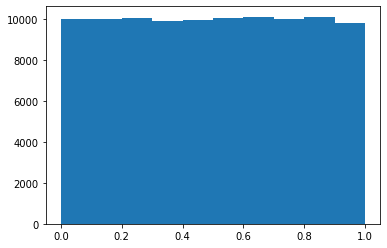

In [8]:
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
# Plot a histogram Uniform
_ = plt.hist(random_numbers)

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="The-np.random-module-and-Bernoulli-trials">
<a class="anchor" href="#The-np.random-module-and-Bernoulli-trials" aria-hidden="true"><span class="octicon octicon-link"></span></a>The np.random module and Bernoulli trials<a class="anchor-link" href="#The-np.random-module-and-Bernoulli-trials"><i class="fas fa-link fa-xs"></i></a>
</h3>
<p>You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, <code>perform_bernoulli_trials(n, p)</code>, which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the <code>np.random.random()</code> function, which returns a random number between zero and one.</p>

</div>

In [9]:
def perform_bernoulli_trials(n,p):

    """
    Let p be the probability of success in a Bernoulli trial, and q be the probability of failure.
    Perform n Bernoulli trials with success probability p and return number of successes
    """

    # Initialize number of successes: n_successes
    n_success  = 0

    # Perform no of Trails
    for i in range(n):
        
        #  Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it`s a success so add one to n_success
        if random_number<p:
            n_success +=1
    return n_success

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="How-many-defaults-might-we-expect?">
<a class="anchor" href="#How-many-defaults-might-we-expect?" aria-hidden="true"><span class="octicon octicon-link"></span></a>How many defaults might we expect?<a class="anchor-link" href="#How-many-defaults-might-we-expect?"><i class="fas fa-link fa-xs"></i></a>
</h3>
<p>Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the <code>perform_bernoulli_trials()</code> function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.</p>

</div>

In [11]:
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Will-the-bank-fail?">
<a class="anchor" href="#Will-the-bank-fail?" aria-hidden="true"><span class="octicon octicon-link"></span></a>Will the bank fail?<a class="anchor-link" href="#Will-the-bank-fail?"><i class="fas fa-link fa-xs"></i></a>
</h3>
<p>Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF.</p>
<p>If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?</p>

</div>

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

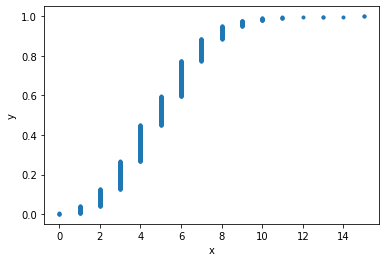

In [13]:
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [14]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =',n_lose_money/len(n_defaults))

Probability of losing money = 0.022


<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="Probability-distributions-and-stories:-The-Binomial-distribution">
<a class="anchor" href="#Probability-distributions-and-stories:-The-Binomial-distribution" aria-hidden="true"><span class="octicon octicon-link"></span></a>Probability distributions and stories: The Binomial distribution<a class="anchor-link" href="#Probability-distributions-and-stories:-The-Binomial-distribution"><i class="fas fa-link fa-xs"></i></a>
</h2>
<ul>
<li>Probability mass function (PMF)<ul>
<li>The set of probabilities of discrete outcomes</li>
</ul>
</li>
<li>Probability distribution<ul>
<li>A mathmatical description of outcomes</li>
</ul>
</li>
<li>Binomial distribution<ul>
<li>The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed</li>
<li>The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed</li>
</ul>
</li>
</ul>

</div>


<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Sampling-out-of-the-Binomial-distribution">
<a class="anchor" href="#Sampling-out-of-the-Binomial-distribution" aria-hidden="true"><span class="octicon octicon-link"></span></a>Sampling out of the Binomial distribution<a class="anchor-link" href="#Sampling-out-of-the-Binomial-distribution"><i class="fas fa-link fa-xs"></i></a>
</h3>
<p>Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using <code>np.random.binomial()</code>. This is identical to the calculation you did in the last set of exercises using your custom-written <code>perform_bernoulli_trials()</code> function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.</p>
<p>Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with <code>np.random.seed(42)</code>) to save you typing that each time.</p>

</div>

In [15]:
np.random.seed(42)
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

In [16]:
# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Plotting-the-Binomial-PMF">
<a class="anchor" href="#Plotting-the-Binomial-PMF" aria-hidden="true"><span class="octicon octicon-link"></span></a>Plotting the Binomial PMF<a class="anchor-link" href="#Plotting-the-Binomial-PMF"><i class="fas fa-link fa-xs"></i></a>
</h3>
<p>Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to <code>plt.hist()</code> via the <code>bins</code> keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to <code>max(n_defaults) + 1.5</code>. You can generate an array like this using <code>np.arange()</code> and then subtracting 0.5 from the array.</p>
<p>You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array <code>n_defaults</code>.</p>

</div>

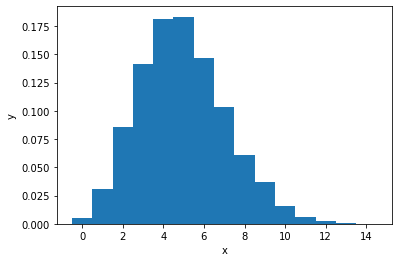

In [17]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 2) - 0.5
# Generate histogram
_ = plt.hist(n_defaults, bins=bins, density=True)

# Label axes
_ = plt.xlabel('x')
_ = plt.ylabel('y')

## Poisson processes and the Poisson distribution
- Poisson process
    - The timing of the next event is completely independent of when the previous event happened
- Example
    - Natural births in a given hospital
    - Hit on a website during a given hour
    - Meteor strikes
    - Molecular collisions in a gas
    - Aviation incidents
    - Buses in Poissonville
- Poisson Distribution
    - The number r of arrivals of a Poisson process in a given time interval with average rate of? arrivals per interval is Poisson distributed.
    - The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.
    - Limit of the Binomial distribution for low probability of success and large number of trials
    

### Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [18]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson), np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    
    # Print results
    print('n = ', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))

Poisson:      9.9732 3.1276319732347027
n =  20 Binom: 9.9999 2.243858282066851
n =  100 Binom: 9.9957 2.998346462635698
n =  1000 Binom: 9.997 3.124162447761


### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [19]:

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067
